### Assignment 3 by Hamna Qamar
#### EDA / ML (Classification)


#### Hotel Reservation Kaggle Dataset: 
-Conducted EDA and feature engineering 
-Applied outlier removal for enhanced model performance.
-Utilized Scikit-learn for label encoding and data scaling.
-Employed Decision Trees, Random Forest, and Logistic Regression for classification.
-Achieved [89% accuracy] in predicting hotel booking statuses.
-Implemented systematic feature refinement for improved model robustness.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette(['#3F7C85', '#FF5F5D', '#00CCBF', '#72F2EB', '#747E7E'])

In [2]:
df = pd.read_csv('Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [5]:
df.shape

(36275, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [19]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [9]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of numerical variables: ', len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  14


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0


In [14]:
# list of categorical variables
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of categorical variables: ', len(categorical_features))

df[categorical_features].head()

Number of categorical variables:  5


,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,INN00001,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,INN00002,Not Selected,Room_Type 1,Online,Not_Canceled
2,INN00003,Meal Plan 1,Room_Type 1,Online,Canceled
3,INN00004,Meal Plan 1,Room_Type 1,Online,Canceled
4,INN00005,Not Selected,Room_Type 1,Online,Canceled


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

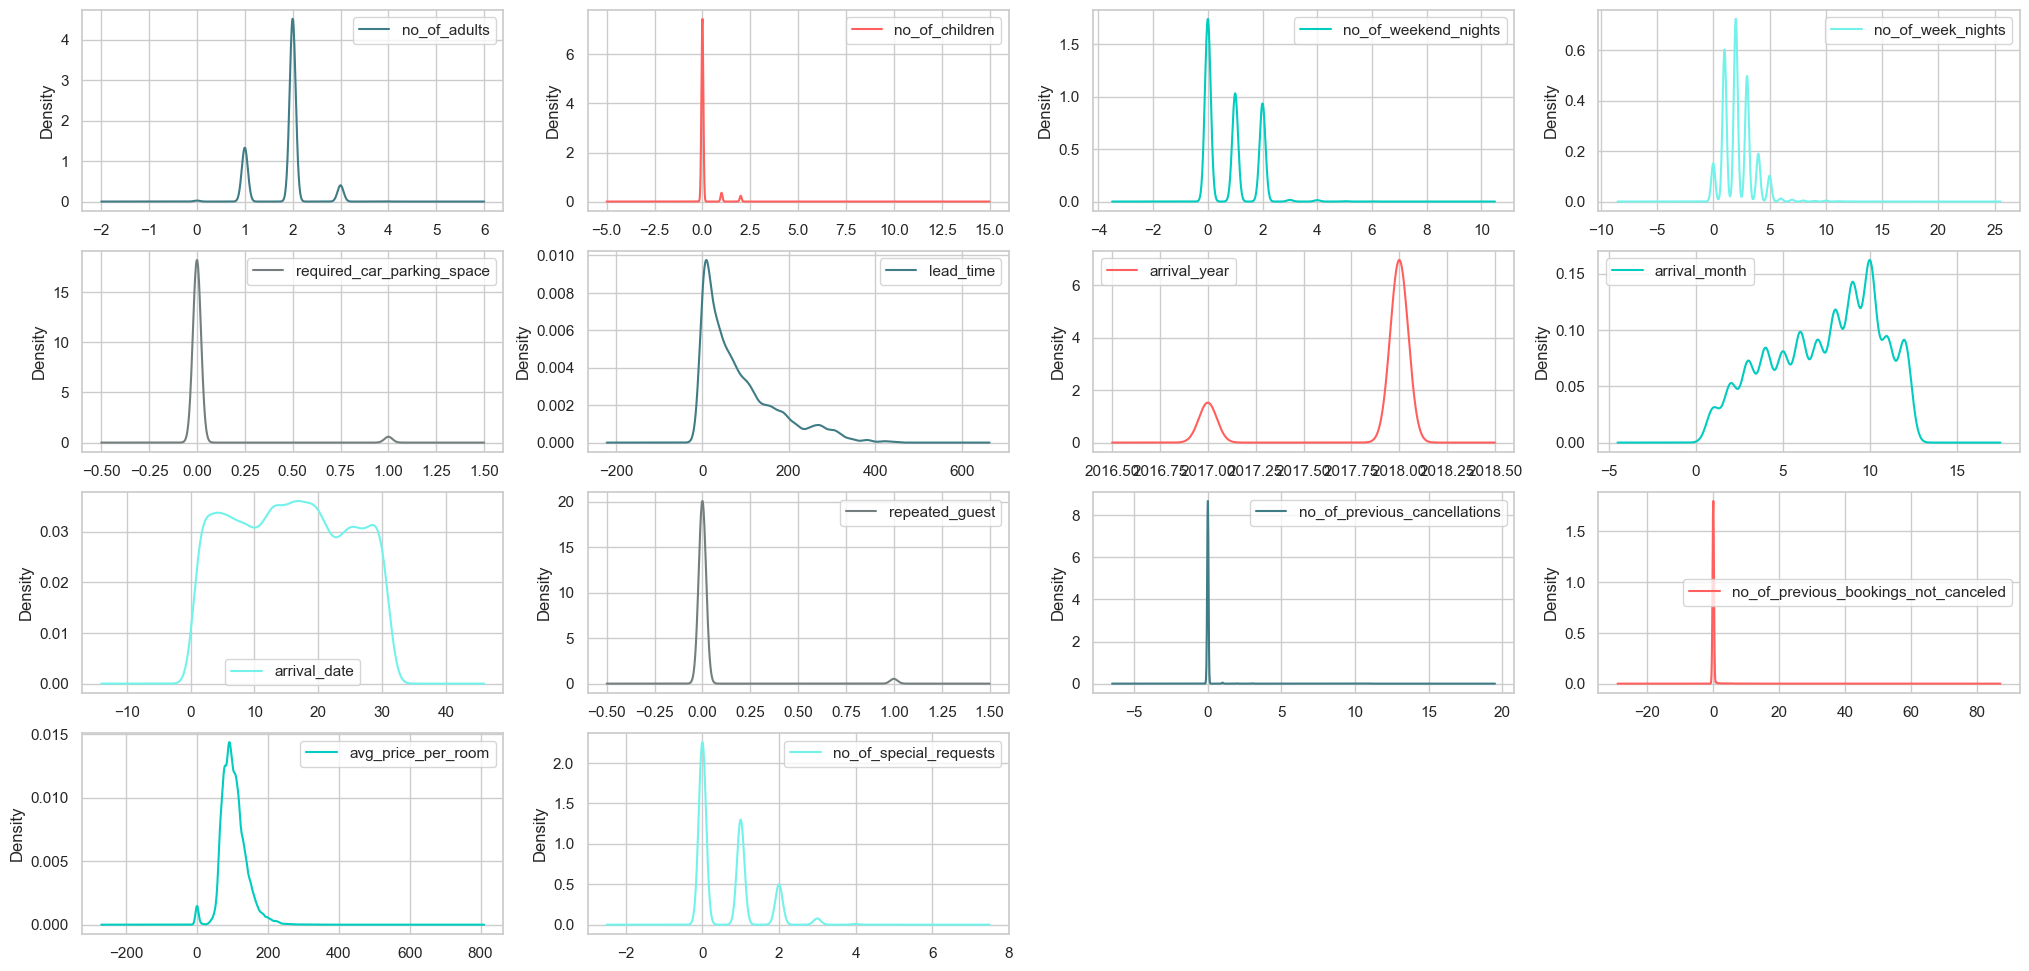

In [15]:
# creating the density plot for numerical columns
df[numerical_features].plot(kind='density',subplots=True,layout=(4,4),sharex=False,figsize=(25,12))

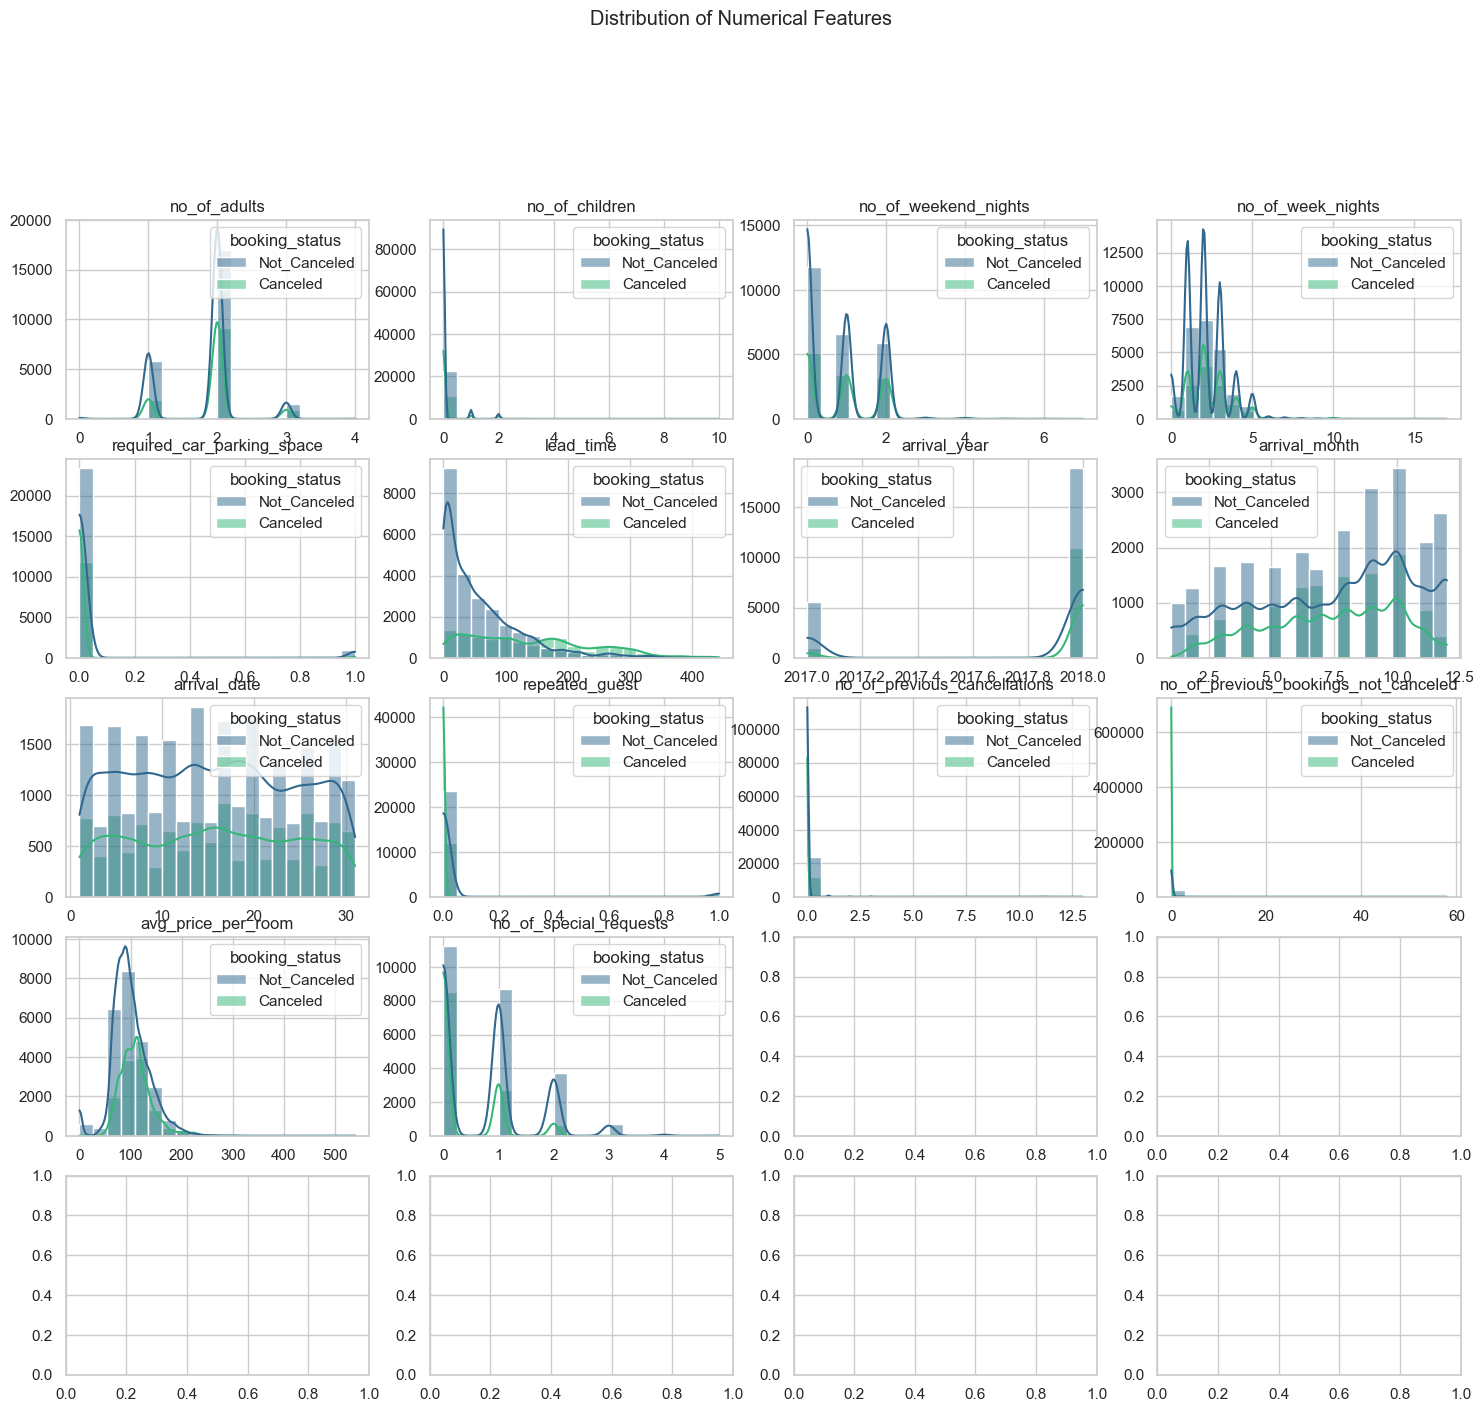

In [16]:
# Set up the layout for subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18, 15))
fig.suptitle('Distribution of Numerical Features', y=1.02)

# Plotting histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    if i < len(axes.flat):
        sns.histplot(df, x=feature, bins=20, kde=True, ax=axes.flat[i], hue='booking_status', palette='viridis')
        axes.flat[i].set_title(feature)
        axes.flat[i].set_xlabel('')
        axes.flat[i].set_ylabel('')
# Show the plot
plt.show()

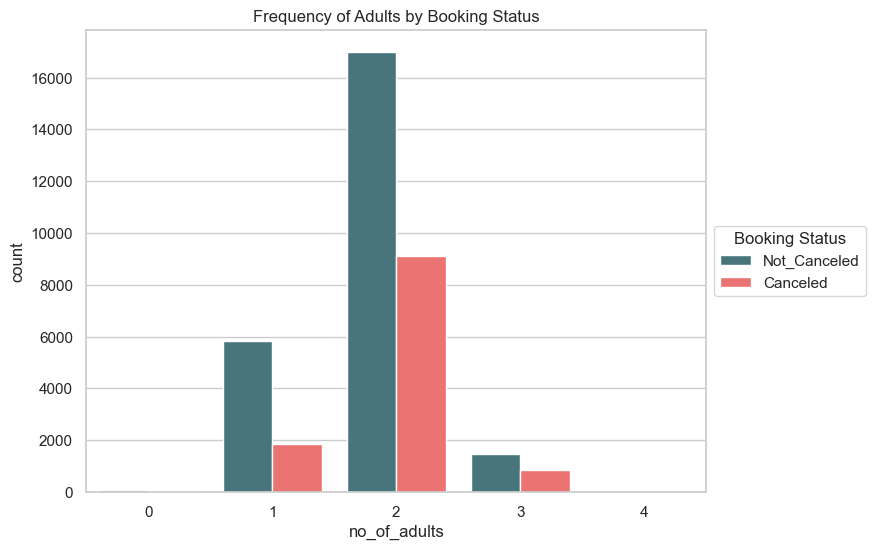

In [17]:
#plotting count plot of number of adults in comparison to booking status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="no_of_adults", hue="booking_status")
plt.title('Frequency of Adults by Booking Status')
plt.legend(title="Booking Status", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

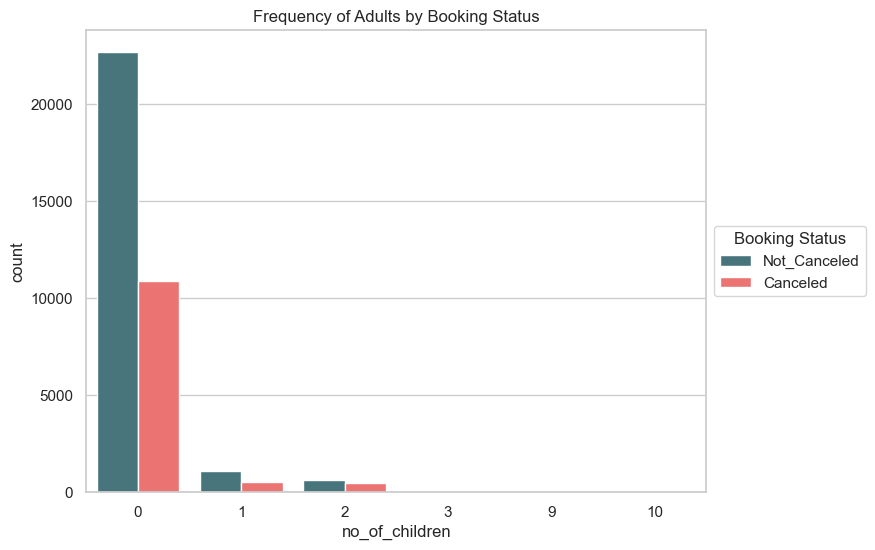

In [18]:
#plotting count plot for number of children and booking status relation
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="no_of_children", hue="booking_status")
plt.title('Frequency of Adults by Booking Status')
plt.legend(title="Booking Status", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

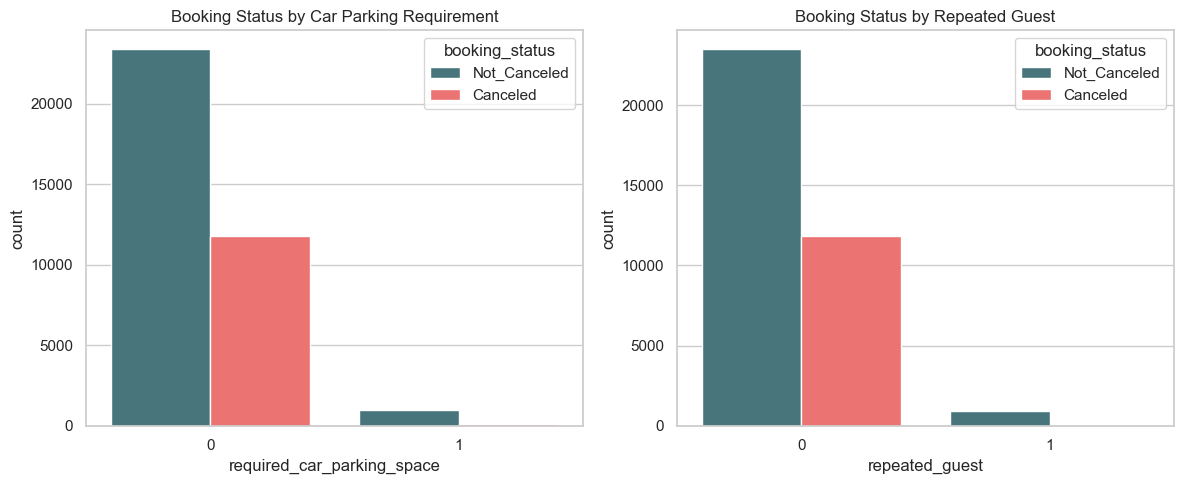

In [22]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1 
sns.countplot(data=df, x="required_car_parking_space", hue="booking_status", ax=axes[0])
axes[0].set_title("Booking Status by Car Parking Requirement")

# Plot 2
sns.countplot(data=df, x="repeated_guest", hue="booking_status", ax=axes[1])
axes[1].set_title("Booking Status by Repeated Guest")

# Display the plots
plt.tight_layout()
plt.show()

<Axes: xlabel='no_of_weekend_nights'>

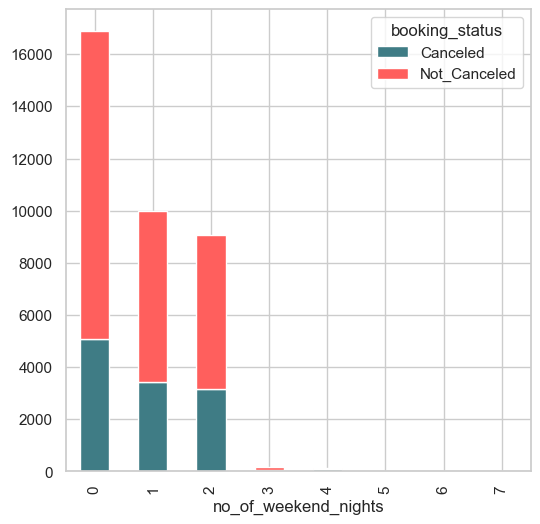

In [23]:
#plotting stacked bar plot for weekend nights
df.groupby('no_of_weekend_nights')['booking_status'].value_counts().unstack('booking_status').plot(kind ='bar', stacked = True
                                                                        , figsize = (6,6))

<Axes: xlabel='no_of_week_nights'>

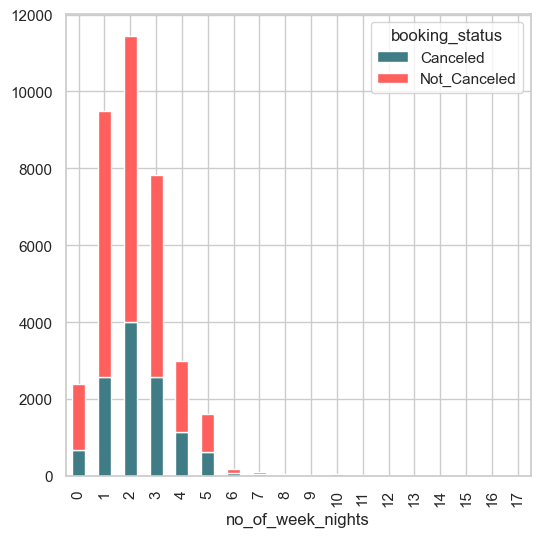

In [50]:
#plotting stacked bar plot for weekday nights
df.groupby('no_of_week_nights')['booking_status'].value_counts().unstack('booking_status').plot(kind ='bar', stacked = True
                                                                        , figsize = (6,6))

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11692\4265982244.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


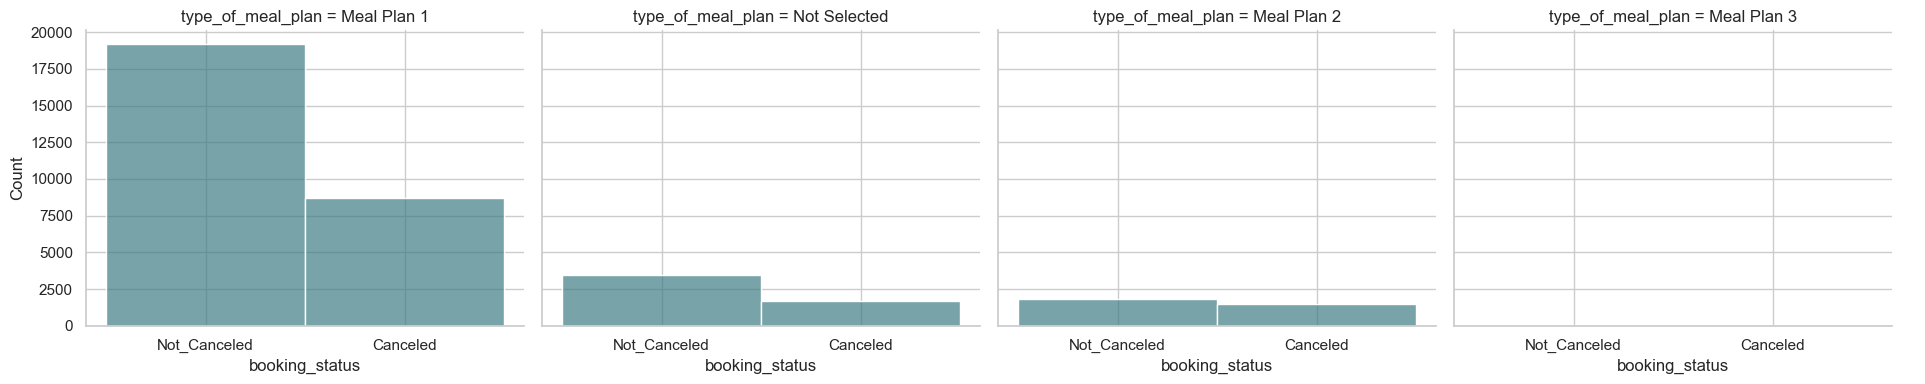

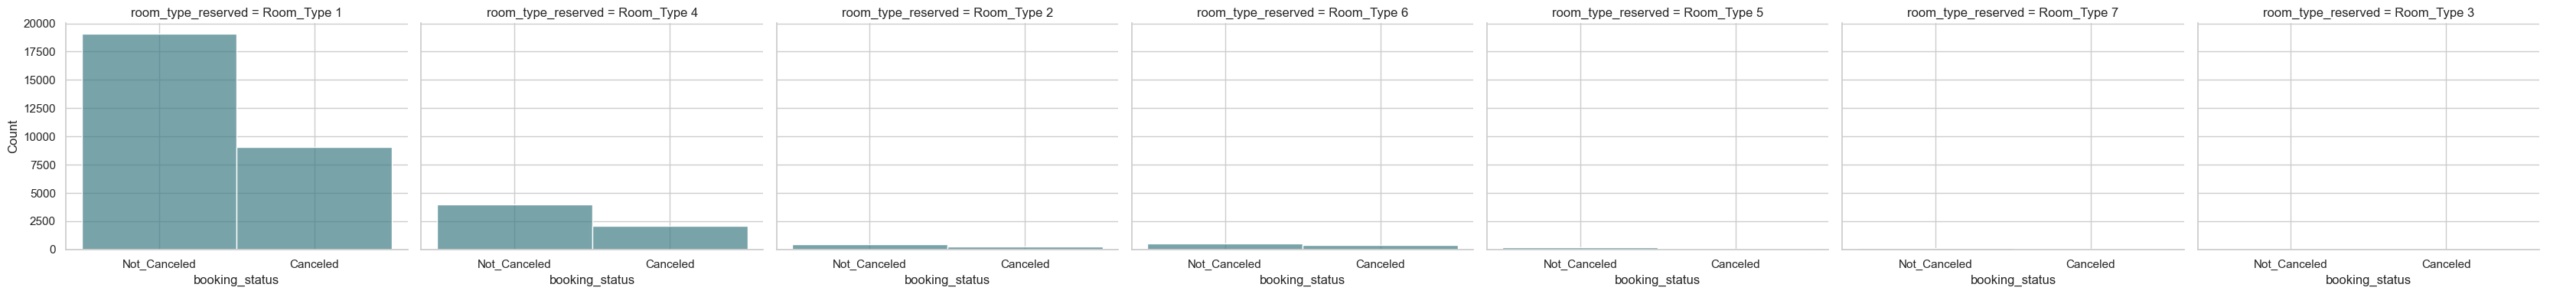

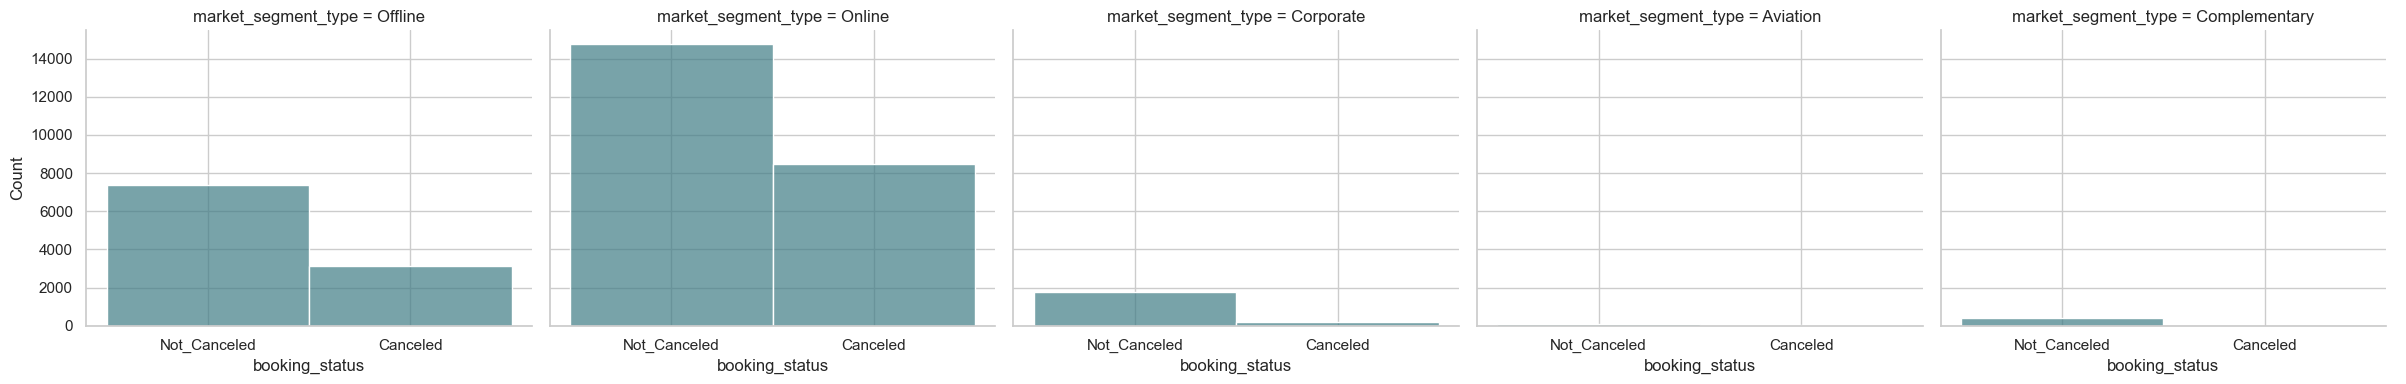

In [31]:
# Creating subplots using Seaborn FacetGrid
columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

for col in columns:
    g = sns.FacetGrid(df, col=col, height=4, aspect=1.2)
    g.map(sns.histplot, 'booking_status', alpha=0.7)
    g.add_legend()

plt.tight_layout()
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


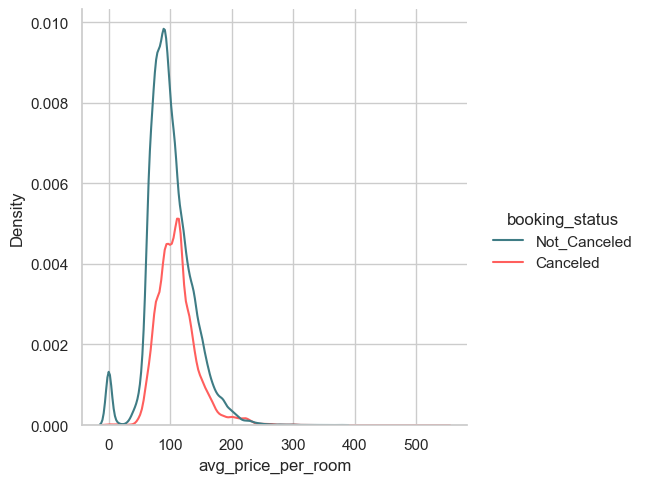

In [33]:
sns.displot(df,x="avg_price_per_room",hue="booking_status", kind="kde")

In [3]:
#removing outliers from average price per room 
def remove_outliers(data, column_name):
    q1, q3 = data[column_name].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    # Removing outliers
    data_no_outliers = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    return data_no_outliers


In [4]:
df_no_outliers = remove_outliers(df, 'avg_price_per_room')

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


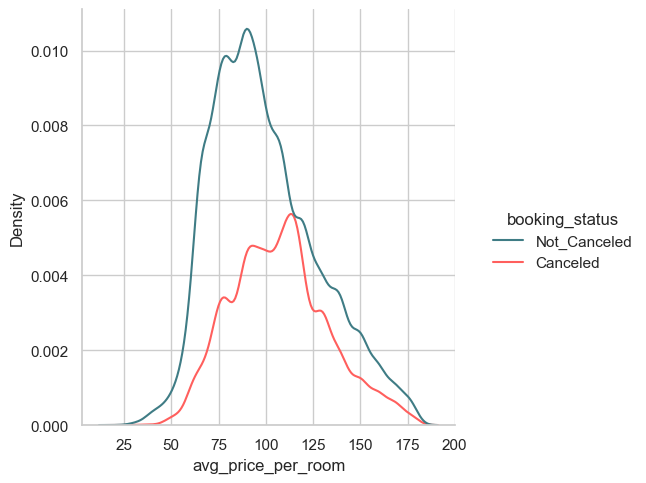

In [36]:
sns.displot(df_no_outliers,x="avg_price_per_room",hue="booking_status", kind="kde")

In [6]:

average_price_all = df_no_outliers['avg_price_per_room'].mean()
average_price_not_canceled = df_no_outliers[df_no_outliers['booking_status'] == 'Not_Canceled']['avg_price_per_room'].mean()
average_price_canceled = df_no_outliers[df_no_outliers['booking_status'] == 'Canceled']['avg_price_per_room'].mean()

print("The average price per room is:", average_price_all)
print("The average price per room for customers not canceled is:", average_price_not_canceled)
print("The average price per room for canceled customers is:", average_price_canceled)


The average price per room is: 102.09358194279767
The average price per room for customers not canceled is: 99.61147763647375
The average price per room for canceled customers is: 107.10023819911004


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Room_Type 1'),
  Text(1, 0, 'Room_Type 4'),
  Text(2, 0, 'Room_Type 2'),
  Text(3, 0, 'Room_Type 6'),
  Text(4, 0, 'Room_Type 5'),
  Text(5, 0, 'Room_Type 7'),
  Text(6, 0, 'Room_Type 3')])

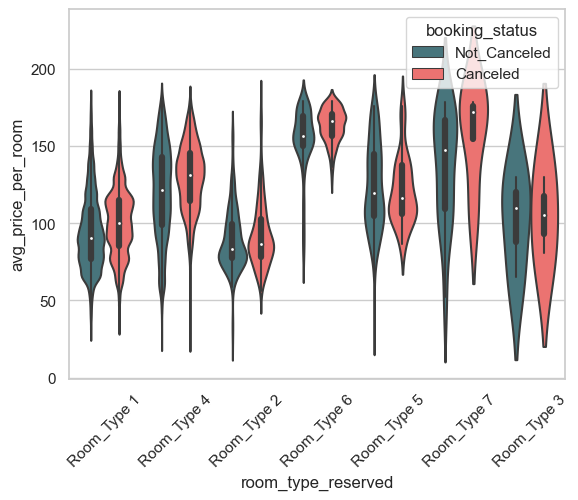

In [6]:
#plotting violin plot
sns.violinplot(data=df_no_outliers, x="room_type_reserved", y="avg_price_per_room", hue="booking_status")
plt.xticks(rotation=45)

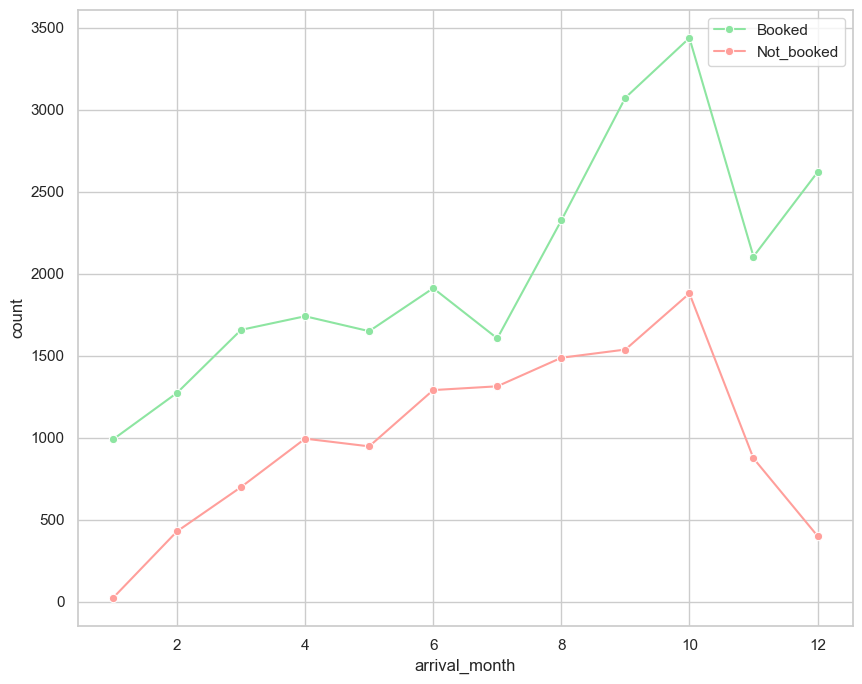

In [51]:
booked = df[df['booking_status'] == 'Not_Canceled'].groupby('arrival_month').size().reset_index(name='booked')
not_booked = df[df['booking_status'] == 'Canceled'].groupby('arrival_month').size().reset_index(name='not_booked')

# Merge the two dataframes on 'arrival_month'
booking_by_month = booked.merge(not_booked, on='arrival_month', how='outer').fillna(0)

plt.figure(figsize=(10, 8))
ax = plt.gca() 

# Plot for booked
booked_color = sns.color_palette('pastel')[2]
sns.lineplot(data=booking_by_month, x='arrival_month', y='booked', label='Booked', color=booked_color, marker='o', ax=ax)

# Plot for Not booked
non_booked_color = sns.color_palette('pastel')[3]
sns.lineplot(data=booking_by_month, x='arrival_month', y='not_booked', label='Not_booked', color=non_booked_color, marker='o', ax=ax)

plt.ylabel('count')
plt.show()

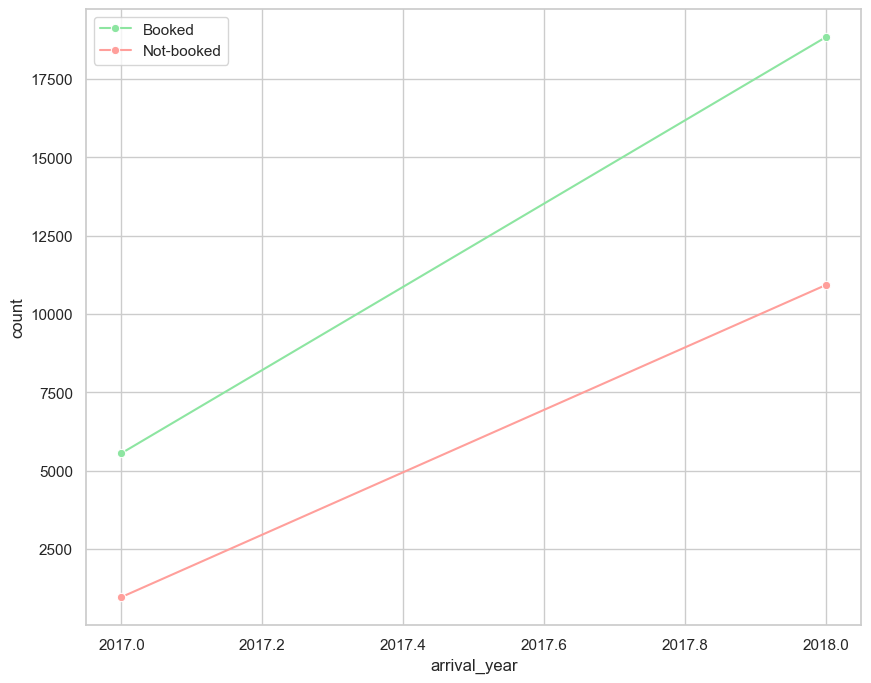

In [52]:
booked = df[df['booking_status'] == 'Not_Canceled'].groupby('arrival_year').size().reset_index(name='booked')
not_booked = df[df['booking_status'] == 'Canceled'].groupby('arrival_year').size().reset_index(name='not_booked')

# Merge the two dataframes on 'arrival_year'
booking_by_year = booked.merge(not_booked, on='arrival_year', how='outer').fillna(0)

plt.figure(figsize=(10, 8))
ax = plt.gca()  # Get current axis

# Plot for Booked
booked_color = sns.color_palette('pastel')[2]
sns.lineplot(data=booking_by_year, x='arrival_year', y='booked', label='Booked', color=booked_color, marker='o', ax=ax)

# Plot for Not booked
non_booked_color = sns.color_palette('pastel')[3]
sns.lineplot(data=booking_by_year, x='arrival_year', y='not_booked', label='Not-booked', color=non_booked_color, marker='o', ax=ax)

plt.ylabel('count')
plt.show()

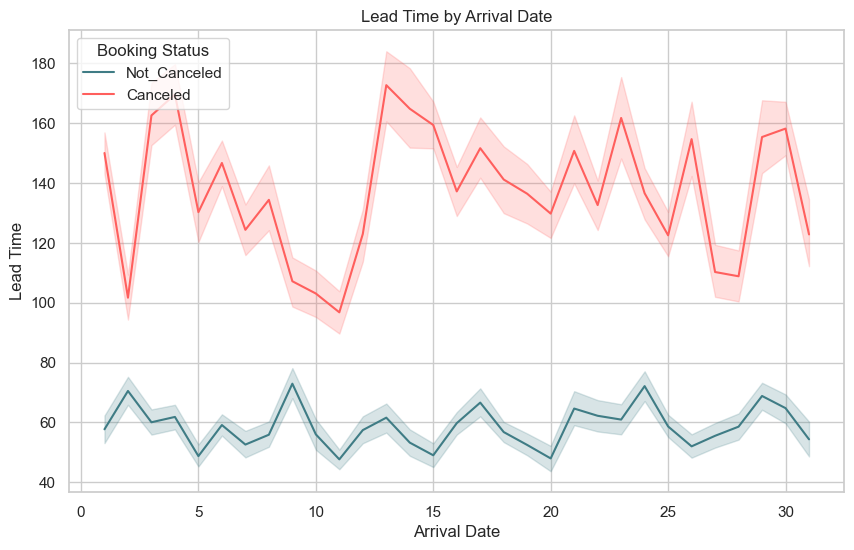

In [11]:
#plotting line plot 
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='arrival_date', y='lead_time', hue='booking_status')
plt.title('Lead Time by Arrival Date')
plt.xlabel('Arrival Date')
plt.ylabel('Lead Time')
plt.grid(True)
plt.legend(title='Booking Status', loc='upper left')
plt.show()

In [15]:
# Datatype changing
categorical =df.select_dtypes(exclude=[np.number])

for i in categorical.columns:
    df[i]=df[i].astype('category')

# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  category
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

In [21]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()

# Iterate through each categorical column
for column in categorical.columns:
    encoder = LabelEncoder()
    df_encoded[column + "_encoded"] = encoder.fit_transform(df[column])

# Now 'df_encoded' contains both original and encoded categorical columns

# Taking numerical values from the encoded DataFrame
num = df_encoded.select_dtypes(include=[np.number])

# Selecting features & target variable
x = num.drop('booking_status_encoded', axis=1)
y = num['booking_status_encoded']

In [22]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [23]:
x_scaled.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,Booking_ID_encoded,type_of_meal_plan_encoded,room_type_reserved_encoded,market_segment_type_encoded
0,0.0,0.0,0.0,0.0,0.0,1.532110,-1.0,0.4,-0.933333,0.0,0.0,0.0,-0.867758,0.0,-1.000000,0.0,0.0,-1.0
1,0.0,0.0,0.5,0.5,0.0,-0.477064,0.0,0.6,-0.666667,0.0,0.0,0.0,0.182116,1.0,-0.999945,3.0,0.0,0.0
2,-1.0,0.0,0.5,-0.5,0.0,-0.513761,0.0,-1.2,0.800000,0.0,0.0,0.0,-0.993703,0.0,-0.999890,0.0,0.0,0.0
3,0.0,0.0,-0.5,0.0,0.0,1.412844,0.0,-0.6,0.266667,0.0,0.0,0.0,0.013854,0.0,-0.999835,0.0,0.0,0.0
4,0.0,0.0,0.0,-0.5,0.0,-0.082569,0.0,-0.8,-0.333333,0.0,0.0,0.0,-0.124685,0.0,-0.999779,3.0,0.0,0.0


In [24]:
data=x.join(y)

# Final scaled Data
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,Booking_ID_encoded,type_of_meal_plan_encoded,room_type_reserved_encoded,market_segment_type_encoded,booking_status_encoded
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,0,0,0,3,1
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,1,3,0,4,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,2,0,0,4,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,3,0,0,4,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0,4,3,0,4,0


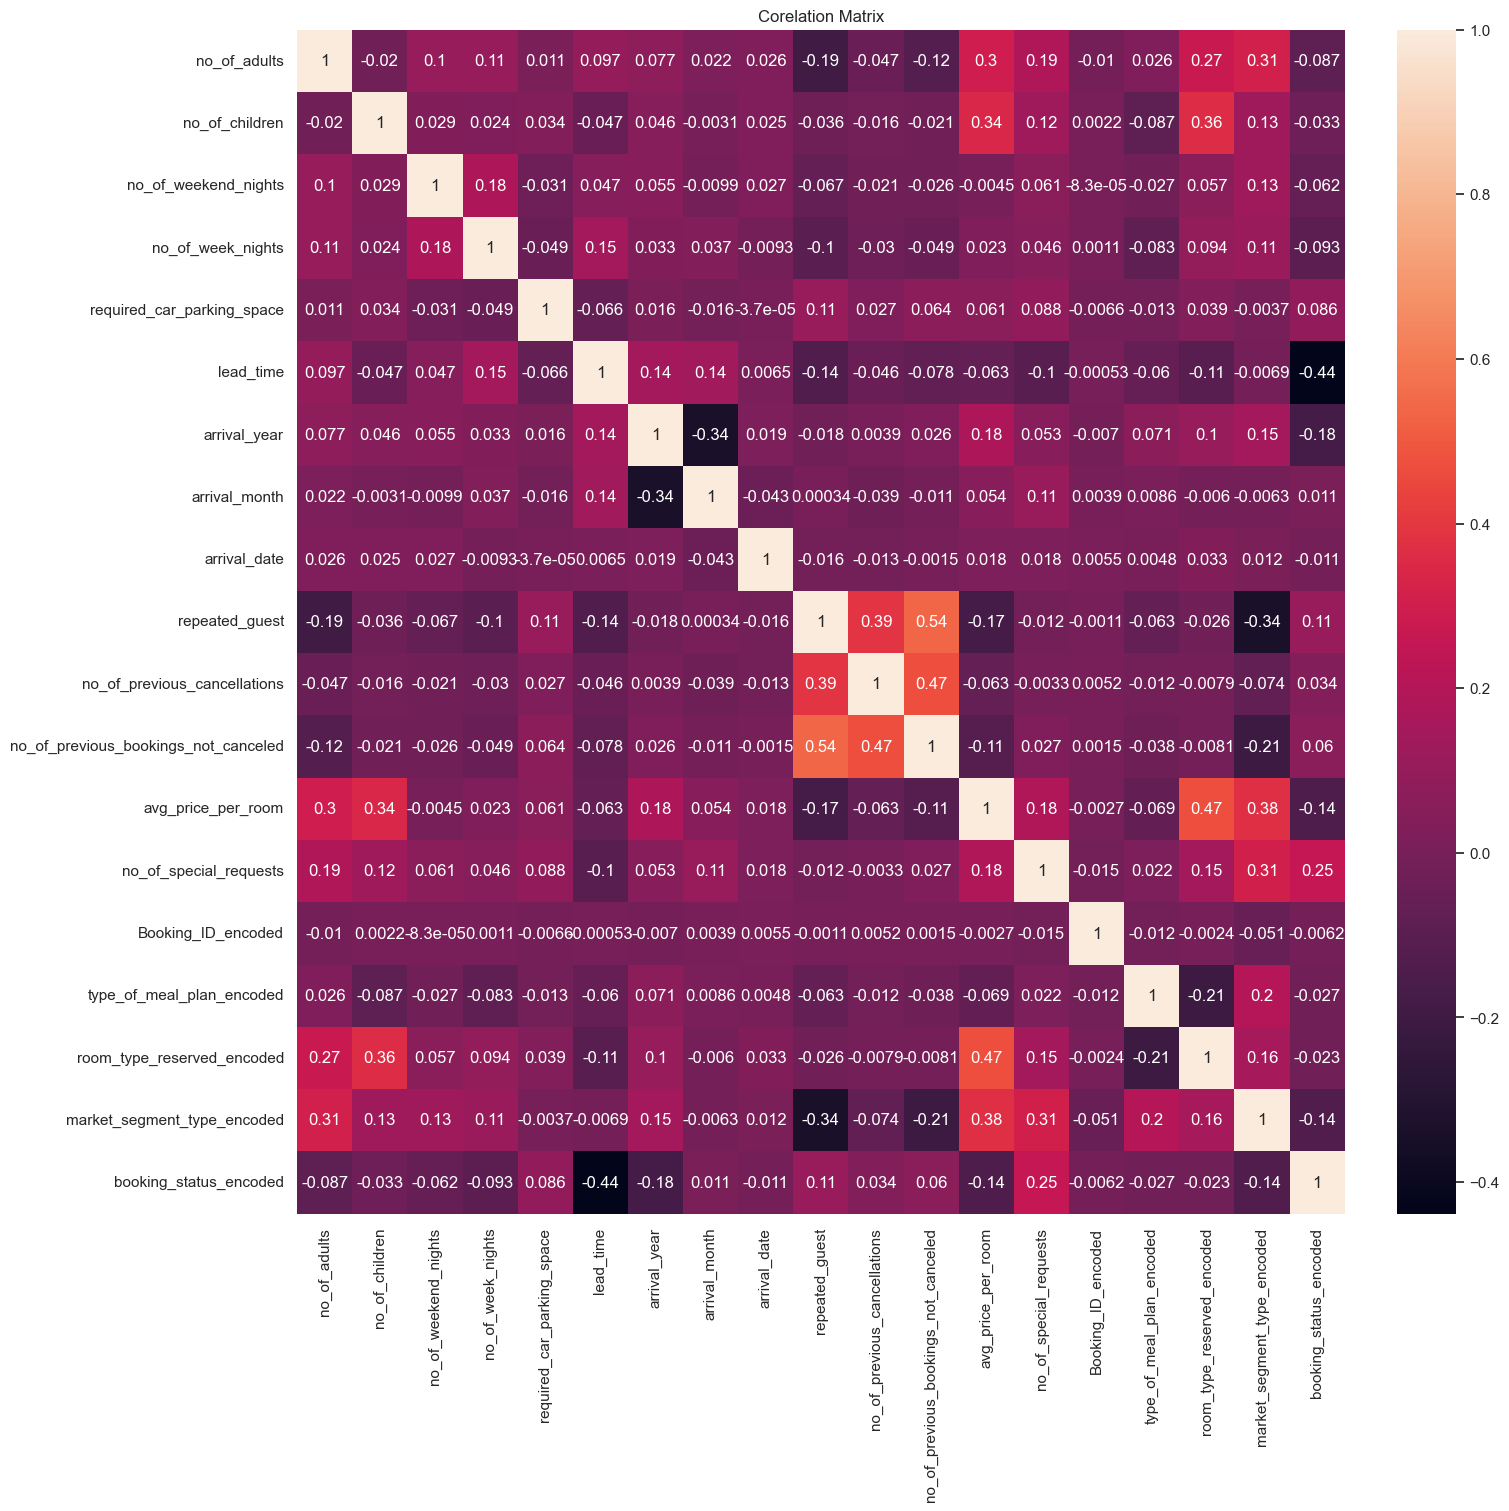

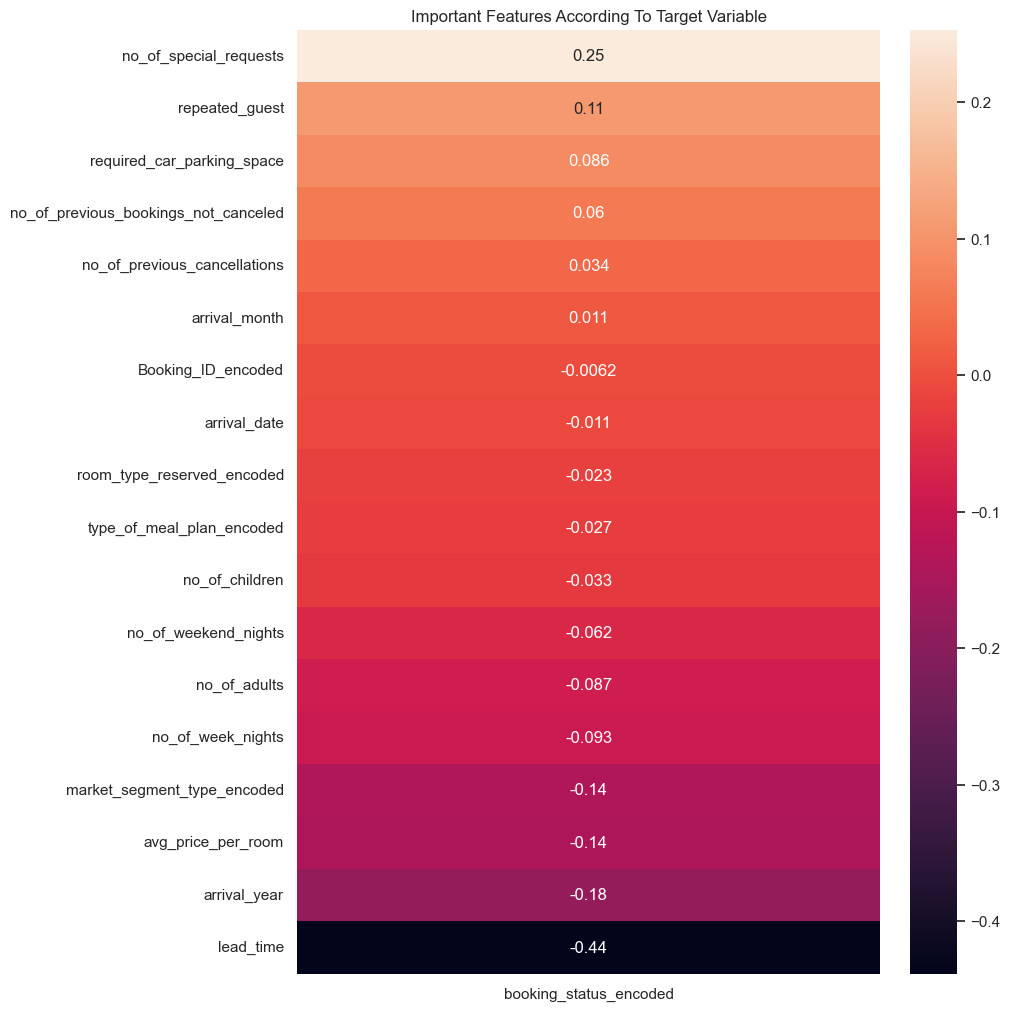

In [28]:
# Corelation Matrix
cor=data.corr()
plt.figure(figsize=(15,15),layout='constrained')
plt.title('Corelation Matrix')
sns.heatmap(cor,annot=True)
plt.show()

# Checling important features according to target variable
cor=data.corr()
target=cor['booking_status_encoded'].drop('booking_status_encoded')
target_s=target.sort_values(ascending=False)
plt.figure(figsize=(10,10),layout='constrained')
plt.title('Important Features According To Target Variable')
sns.heatmap(target_s.to_frame(),annot=True)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

In [34]:
def cal_model(_X_train, _X_test, _y_train, _y_test, model):
    # Train the model
    model.fit(_X_train, _y_train)
    
    # Predict using test data
    y_pred = model.predict(_X_test)
    
    # Calculate metrics
    acc = accuracy_score(_y_test, y_pred)
    precision = precision_score(_y_test, y_pred)
    recall = recall_score(_y_test, y_pred)
    f1 = f1_score(_y_test, y_pred)
    
    # Print metrics
    print('###################################################')
    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    
    # Plot confusion matrix
    cm = confusion_matrix(_y_test, y_pred)
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, fmt='.6g')
    plt.title("Confusion Matrix")
    plt.xlabel("Actual")
    plt.ylabel("Prediction")
    plt.show()

###################################################
Model: DecisionTreeClassifier
Accuracy: 0.8481117338969034
Precision: 0.8910835999443595
Recall: 0.8804288070368335
F1 Score: 0.8857241617697892


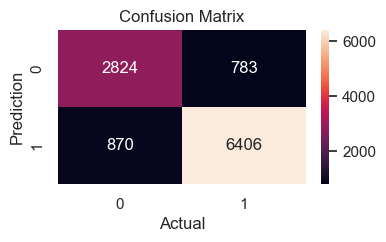

In [39]:
decision_tree = DecisionTreeClassifier()
cal_model(x_train, x_test, y_train, y_test, decision_tree)

###################################################
Model: RandomForestClassifier
Accuracy: 0.8997519066433888
Precision: 0.9065334560273433
Recall: 0.9477735019241341
F1 Score: 0.9266948867835786


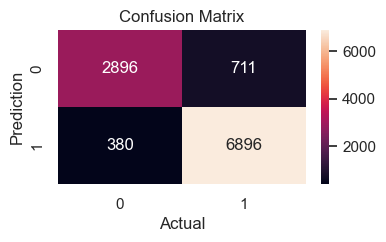

In [47]:
rf = RandomForestClassifier()
cal_model(x_train , x_test, y_train, y_test,rf)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###################################################
Model: LogisticRegression
Accuracy: 0.7737756133419094
Precision: 0.7900698963605688
Recall: 0.9010445299615173
F1 Score: 0.8419160138692693


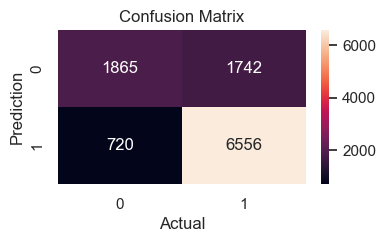

In [49]:
lr = LogisticRegression()
cal_model(x_train , x_test, y_train, y_test,lr)